### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Fix for a copy on write issue I was having
pd.options.mode.copy_on_write = True

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [117]:
data = pd.read_csv('data/coupons.csv')

In [118]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [119]:
# Check percentage of NA rows per column. These are all the columns with # of NAs,
# and percentage of row total that are NA
naCounts = data.isna().sum().reset_index().rename(columns={0:'count'}).query('count > 0')
naCounts['pct'] = naCounts['count']/data.shape[0]
naCounts.sort_values('pct', ascending=False)

,index,count,pct
14,car,12576,0.991485
16,CoffeeHouse,217,0.017108
19,Restaurant20To50,189,0.014901
17,CarryAway,151,0.011905
18,RestaurantLessThan20,130,0.010249
15,Bar,107,0.008436


In [120]:
# Count value frequency for all columns
# toCoupon_GEQ5min is entirely 1s
# there are a lot of values for occupation, but they seem well distributed and tidy
# Income is a string value, but is OK because they are ranges. If I need to do math on it later i can take the median value and cast as integer.
# Car is mostly empty and has vague values as well
# Age has a couple string values, '50plus' and 'below21'. If I need to use this column for calculations I may exclude those or replace with 51 and 20.
colValueCounts=pd.melt(data, var_name='column', value_name='value').groupby(['column','value']).value_counts(dropna=False).reset_index().sort_values(['column','count'], ascending=False)
print(colValueCounts.to_string())

                   column                                      value  count
122               weather                                      Sunny  10069
121               weather                                      Snowy   1405
120               weather                                      Rainy   1210
119      toCoupon_GEQ5min                                          1  12684
117     toCoupon_GEQ25min                                          0  11173
118     toCoupon_GEQ25min                                          1   1511
116     toCoupon_GEQ15min                                          1   7122
115     toCoupon_GEQ15min                                          0   5562
113                  time                                        6PM   3230
114                  time                                        7AM   3164
110                  time                                       10AM   2275
112                  time                                        2PM   2009
111         

3. Decide what to do about your missing data -- drop, replace, other...

In [121]:
# Car is nearly entirely empty, confirming here. Seeing how it's almost entirely empty,
# and the values it does have aren't helpful (do not drive, Car that is too old...), I'm going to
# drop it from the df entirely.
print(data['car'].value_counts(dropna=False))
data = data.drop(columns='car')

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


I also flagged occupation, income, and age as questionnable so here is a closer look

In [122]:
# Occupation looks fine. It could probably be grouped by type but will leave as-is
data['occupation'].value_counts(dropna=False)

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [123]:
# Depending on analysis needed, these categorical ranges may be fine
data['income'].value_counts(dropna=False)

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [124]:
# For age I could replace the string values with 51 and 20. I'll come back here if
# we need this for analysis.
data['age'].value_counts(dropna=False)

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [125]:
# The coupon column is Y, with 1 = accepted, 0 = not accepted
# There aren't any missing values
data['Y'].value_counts(dropna=False)

Y
1    7210
0    5474
Name: count, dtype: int64

In [126]:
# The overall acceptance rate is 56.8%
np.round(data['Y'].mean(),3)

0.568

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Count')

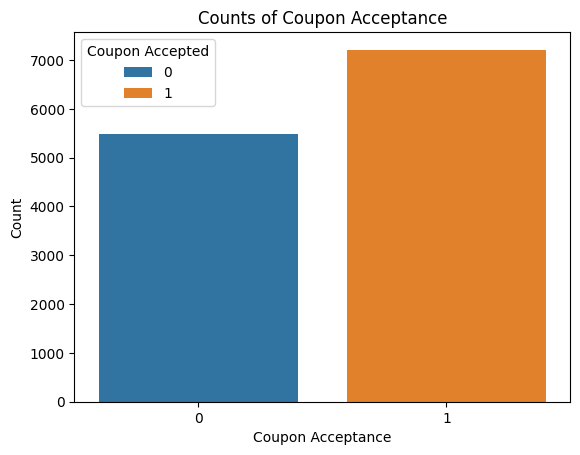

In [127]:
couponCounts = data['Y'].value_counts().reset_index().rename(columns={'Y':'Coupon Accepted'})
sns.barplot(couponCounts, x='Coupon Accepted', y='count', hue='Coupon Accepted')
plt.title('Counts of Coupon Acceptance')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

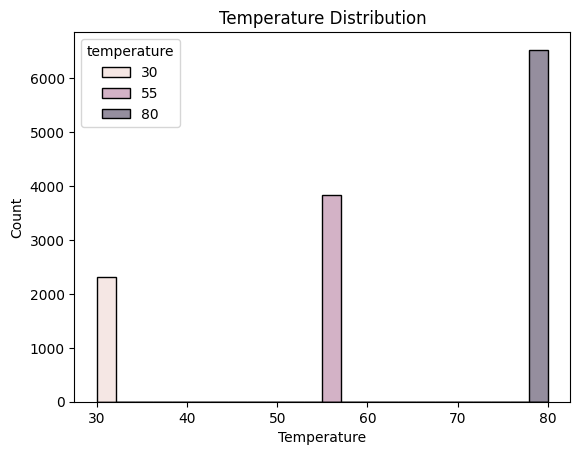

In [128]:
# Only 3 values for temperature
sns.histplot(data, x='temperature', hue='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [129]:
barCoupons = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [130]:
# 41% of bar coupons were accepted
barCoupons['Y'].mean()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
barGrouped
3 or fewer     1797
More than 3     220
Name: count, dtype: int64
    barGrouped         Y
0   3 or fewer  0.370618
1  More than 3  0.731818


Text(0, 0.5, 'Average Acceptance Rate')

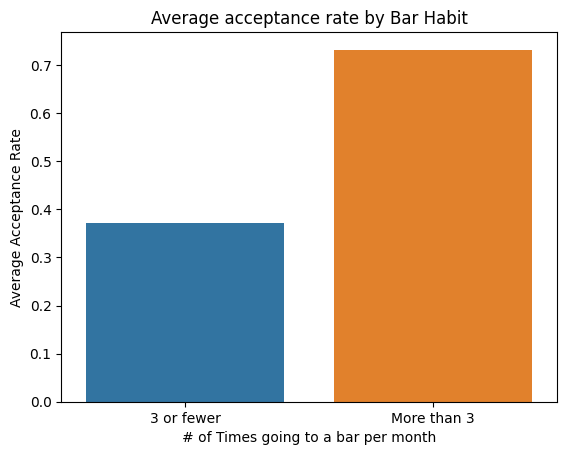

In [131]:
# Current bar values. Needs to be grouped for this plot
print(barCoupons.value_counts('Bar'))

barCoupons['barGrouped'] = 'Other'
barCoupons.loc[barCoupons['Bar'].isin(['never','less1','1~3']), 'barGrouped'] = '3 or fewer'
barCoupons.loc[barCoupons['barGrouped'] == 'Other', 'barGrouped'] = 'More than 3'

# Make sure grouping works
print(barCoupons['barGrouped'].value_counts())

means = barCoupons.groupby('barGrouped')['Y'].mean().reset_index()
print(means)

sns.barplot(means, x='barGrouped', y='Y', hue='barGrouped')
plt.title('Average acceptance rate by Bar Habit')
plt.xlabel('# of Times going to a bar per month')
plt.ylabel('Average Acceptance Rate')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


- Yes, the bar > 1 a month and over 25 have nearly a 70% acceptance rate. The other group is down at 34%.

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64 

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64 

barGrouped4
Other              1597
Over 25, >1 Bar     420
Name: count, dtype: int64 

       barGrouped4         Y
0            Other  0.335003
1  Over 25, >1 Bar  0.695238


Text(0, 0.5, 'Average Acceptance Rate')

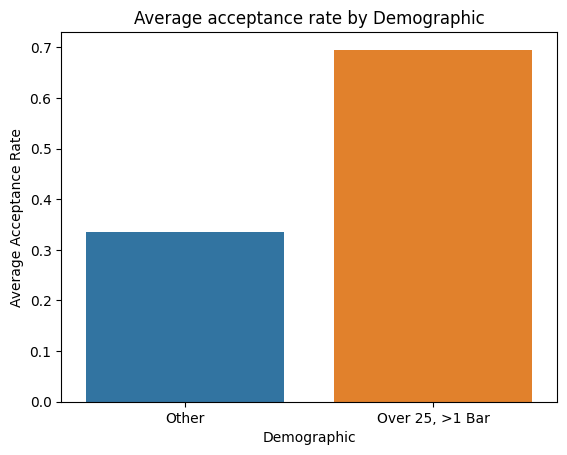

In [132]:
# Print current bar and age values
print(barCoupons.value_counts('Bar'),'\n')
print(barCoupons.value_counts('age'), '\n')

# Age is not numeric, but there aren't many values so I will leave as string
barCoupons['barGrouped4'] = 'Other'
barCoupons.loc[(barCoupons['Bar'].isin(['1~3','4~8','gt8']) &
                barCoupons['age'].isin(['26','31','50plus','36','41','46'])), 'barGrouped4'] = 'Over 25, >1 Bar'

# Make sure grouping works
print(barCoupons['barGrouped4'].value_counts(), '\n')

means = barCoupons.groupby('barGrouped4')['Y'].mean().reset_index()
print(means)

sns.barplot(means, x='barGrouped4', y='Y', hue='barGrouped4')
plt.title('Average acceptance rate by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Average Acceptance Rate')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


- This demographic also has a much higher acceptance rate, also near 70%.

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64 

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64 

False    1466
True      551
Name: count, dtype: int64 

barGrouped5
Other                       1466
Bars, No Kid, NoForestry     551
Name: count, dtype: int64
                barGrouped5         Y
0  Bars, No Kid, NoForestry  0.713249
1                     Other  0.296044


Text(0, 0.5, 'Average Acceptance Rate')

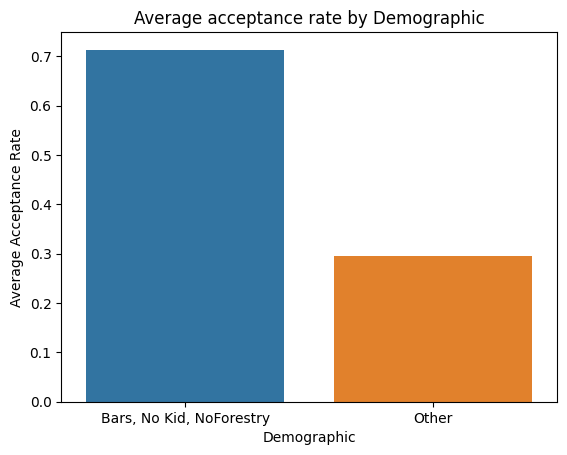

In [133]:
# Check current values for bar, passanger, occupation
print(barCoupons.value_counts('Bar'),'\n')
print(barCoupons.value_counts('passanger'), '\n')
#print(barCoupons.value_counts('occupation'), '\n')

# Make boolean masks for better readability
moreThanOnce = barCoupons['Bar'].isin(['1~3','4~8','gt8'])
noKid = barCoupons['passanger'] != 'Kid(s)'
noForestry = barCoupons['occupation'] != 'Farming Fishing & Forestry'

# Only 551 people meet this criteria
print((moreThanOnce & noKid & noForestry).value_counts(), '\n')

# It won't let me do this for some reason
# barCoupons['barGrouped5'].loc[(moreThanOnce & noKid & noForestry), 'barGrouped5'] = 'Bars, No Kid, NoForestry'

barCoupons['barGrouped5'] = 'Other'
barCoupons.loc[(barCoupons['Bar'].isin(['1~3','4~8','gt8'])) &
               (barCoupons['passanger'] != 'Kid(s)') &
               (barCoupons['occupation'] != 'Farming Fishing & Forestry'),'barGrouped5'] = 'Bars, No Kid, NoForestry'

# Make sure grouping works
print(barCoupons['barGrouped5'].value_counts())

means = barCoupons.groupby('barGrouped5')['Y'].mean().reset_index()
print(means)

sns.barplot(means, x='barGrouped5', y='Y', hue='barGrouped5')
plt.title('Average acceptance rate by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Average Acceptance Rate')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [81]:
# Check current values for bar, passanger, occupation
print(barCoupons.value_counts('Bar'),'\n')
print(barCoupons.value_counts('age'),'\n')
print(barCoupons.value_counts('income'), '\n')
print(barCoupons.value_counts('income'), '\n')
print(barCoupons.value_counts('RestaurantLessThan20'), '\n')
#print(barCoupons.value_counts('occupation'), '\n')

# Make boolean masks for better readability
# moreThanOnce = barCoupons['Bar'].isin(['1~3','4~8','gt8'])
# noKid = barCoupons['passanger'] != 'Kid(s)'
# noForestry = barCoupons['occupation'] != 'Farming Fishing & Forestry'

# # Only 551 people meet this criteria
# print((moreThanOnce & noKid & noForestry).value_counts(), '\n')

# # It won't let me do this for some reason
# # barCoupons['barGrouped5'].loc[(moreThanOnce & noKid & noForestry), 'barGrouped5'] = 'Bars, No Kid, NoForestry'

# barCoupons['barGrouped5'] = 'Other'
# barCoupons.loc[(barCoupons['Bar'].isin(['1~3','4~8','gt8'])) &
#                (barCoupons['passanger'] != 'Kid(s)') &
#                (barCoupons['occupation'] != 'Farming Fishing & Forestry'),'barGrouped5'] = 'Bars, No Kid, NoForestry'

# # Make sure grouping works
# print(barCoupons['barGrouped5'].value_counts())

# means = barCoupons.groupby('barGrouped5')['Y'].mean().reset_index()
# print(means)

# sns.barplot(means, x='barGrouped5', y='Y', hue='barGrouped5')
# plt.title('Average acceptance rate by Demographic')
# plt.xlabel('Demographic')
# plt.ylabel('Average Acceptance Rate')

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64 

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64 

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64 

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64 

RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  